In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import cv2

In [189]:
train_path = "/content/drive/MyDrive/Deep Learning/CNN/Binary_Classification/training_set"
test_path = "/content/drive/MyDrive/Deep Learning/CNN/Binary_Classification/test_set"

In [190]:
import os
os.listdir(test_path)

['dogs', 'cats']

In [191]:
target_labels = ['dogs', 'cats']

#### **We need apply some operations on images in the Training and Testing Folders individually.**

For that we need Tensorflow.

In [192]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [193]:
u_train_obj = ImageDataGenerator(
                                  rescale = 1/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                                  )

u_test_obj = ImageDataGenerator(rescale = 1/255)

In [194]:
final_train_data = u_train_obj.flow_from_directory(train_path ,
                                                   target_size = (256,256),
                                                   classes = target_labels,
                                                   class_mode = "binary",
                                                   batch_size = 5)

Found 40 images belonging to 2 classes.


In [195]:
final_test_data = u_test_obj.flow_from_directory(test_path ,
                                                 target_size = (256,256),
                                                 classes = target_labels)

Found 20 images belonging to 2 classes.


### **Architecture**

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.activations import relu , sigmoid
import warnings
warnings.filterwarnings('ignore')

In [197]:
model = Sequential()

# Layer 1 (kernel and maxpool)
model.add(Conv2D(128 , kernel_size = (3,3) , padding = "same" , input_shape = (int(256) , int(256) , 3),  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 2 (kernels and maxpool)
model.add(Conv2D(64 , kernel_size = (3,3) , padding = "same" ,  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 3 (kernels and maxpool)
model.add(Conv2D(32 , kernel_size = (3,3) , padding = "same" ,  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

# Layer 4 (kernels and maxpool)
model.add(Conv2D(6 , kernel_size = (3,3) , padding = "same" ,  activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())  # to convert 1D array

#Ann arch

model.add(Dense(32 , activation="relu"))
model.add(Dense(16 , activation="relu"))

#output Layer

model.add(Dense(1 , activation="sigmoid")) # 1 because of binary classification

In [198]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 256, 256, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 128, 128, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 32, 32, 6)           │           1,734 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │          49,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,303 (575.40 KB)

 Trainable params: 147,303 (575.40 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
model.compile(optimizer="adam" , loss = "binary_crossentropy" , metrics = ["Accuracy"])

In [200]:
model.fit(final_train_data,
          epochs = 50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - Accuracy: 0.3131 - loss: 0.7113
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Accuracy: 0.3667 - loss: 0.6950
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Accuracy: 0.4869 - loss: 0.6949
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - Accuracy: 0.4686 - loss: 0.6936
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Accuracy: 0.3212 - loss: 0.6943
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Accuracy: 0.5734 - loss: 0.6930
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - Accuracy: 0.5852 - loss: 0.6931
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - Accuracy: 0.5020 - loss: 0.6932
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - Accuracy: 0.5157 - loss: 0.6931
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - Accuracy: 0.5448 - loss: 0.6926
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - Accuracy: 0.5268 - loss: 0.6927
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - Accuracy: 0.6202 - loss: 0.6918
E

In [201]:
model.predict(final_test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step


array([[0.70435834],
       [0.3817817 ],
       [0.22110526],
       [0.10991395],
       [0.61585826],
       [0.7516772 ],
       [0.02095357],
       [0.6722621 ],
       [0.14588515],
       [0.16899468],
       [0.71278584],
       [0.7641273 ],
       [0.8889235 ],
       [0.15569782],
       [0.7098943 ],
       [0.42891738],
       [0.3955258 ],
       [0.368212  ],
       [0.01924333],
       [0.98636484]], dtype=float32)

In [202]:
def checking(path):
  test_image = cv2.imread(path,1) # reading the image

  re_test_img = cv2.resize(test_image,(256,256)) # resizing the image

  sc_test_img = re_test_img / 255 # scale down the pixels

  final_input_image = tensorflow.expand_dims(sc_test_img,axis=0) # adding an extra dimension

  if model.predict(final_input_image)[0][0] > 0.5 :
    print('cat')
  else :
    print("dog")

  plt.imshow(sc_test_img[:,:,::-1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
cat


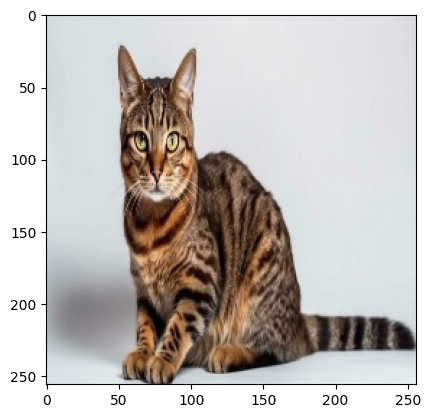

In [203]:
checking("/content/cute-cat-isolated-on-solid-background-photo.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
dog


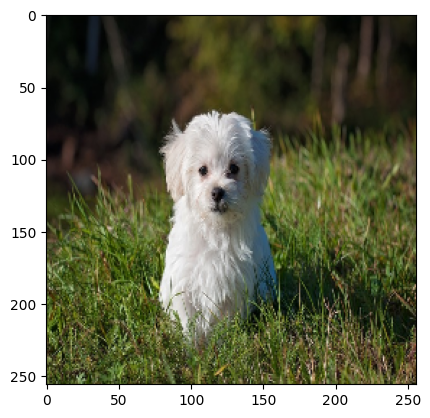

In [205]:
checking("/content/maltese-1123016_640.jpg")